In [2]:
from langgraph.graph import StateGraph, END, START
from typing import TypedDict

In [ ]:
# State

class BatsmanState(TypedDict):

    runs: int
    balls: int
    fours: int
    sixs: int

    strike_rate: float
    bpb: float
    boundary_percent: float
    summary: str

In [21]:
def cal_sr(state:BatsmanState)->BatsmanState:

    runs = state["runs"]
    balls = state["balls"]

    sr = (runs/balls)*100
    state["strike_rate"] = round(sr,2)
    return state 

In [51]:
def cal_bpb(state:BatsmanState)->BatsmanState:

    bpb = (state['balls']/(state["fours"]+state["sixs"]))
    state["bpb"] = round(bpb,2)
    return state

In [52]:
def boundary_per(state:BatsmanState)->BatsmanState:

    runs = state["runs"]
    sixs = state["sixs"]
    fours = state["fours"]

    b_per = ((sixs*6)+(fours*4))/runs*100
    state["boundary_percent"]  = round(b_per,2)
    return state

In [53]:
graph = StateGraph(BatsmanState)

graph.add_node("cal_sr",cal_sr)
graph.add_node("b_per",boundary_per)
graph.add_node("bpb",cal_bpb)

graph.add_edge(START,"cal_sr")
graph.add_edge("cal_sr","b_per")
graph.add_edge("b_per","bpb")
graph.add_edge("bpb",END)

workflow = graph.compile()

In [54]:
intial_sate = {"runs":100,"balls":80,"fours":10,"sixs":5}

In [55]:
final_state = workflow.invoke(intial_sate)
final_state

{'runs': 100,
 'balls': 80,
 'fours': 10,
 'sixs': 5,
 'strike_rate': 125.0,
 'bpb': 5.33,
 'boundary_percent': 70.0}

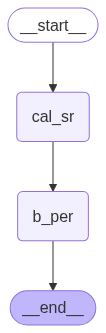

In [40]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())